In [ ]:
# ✅ Install the required packages (uncomment if running first time)
!pip install agno openai groq duckduckgo-search yfinance

# ✅ Import packages
from agno.agent import Agent
from agno.models.groq import Groq
from agno.tools.duckduckgo import DuckDuckGoTools
from agno.tools.yfinance import YFinanceTools
import os

# ✅ Set your Groq API Key
os.environ["GROQ_API_KEY"] =  # 👈 Use your key here

# ✅ Web Agent - general online info
web_agent = Agent(
    name="Web Agent",
    role="Search the web for company insights",
    model=Groq(id="llama3-8b-8192"),
    tools=[DuckDuckGoTools()],
    instructions="Always include the sources. Focus on business insights.",
    show_tool_calls=True,
    markdown=True,
)

# ✅ Finance Agent - uses Yahoo Finance tools
finance_agent = Agent(
    name="Finance Agent",
    role="Fetch detailed financial data",
    model=Groq(id="llama3-8b-8192"),
    tools=[YFinanceTools(
        stock_price=True,
        analyst_recommendations=True,
        stock_fundamentals=True,
        company_info=True
    )],
    instructions="Use tables to show financials clearly. Give analyst opinion.",
    show_tool_calls=True,
    markdown=True,
)

# ✅ News Agent - only fetches recent news headlines
news_agent = Agent(
    name="News Agent",
    role="Search recent financial news for companies",
    model=Groq(id="llama3-8b-8192"),
    tools=[DuckDuckGoTools()],
    instructions="Summarize and extract 3 recent news headlines per company. Include sources.",
    show_tool_calls=True,
    markdown=True,
)

# ✅ Sentiment Agent - analyzes tone of news headlines
sentiment_agent = Agent(
    name="Sentiment Agent",
    role="Analyze sentiment from recent headlines",
    model=Groq(id="llama3-8b-8192"),
    tools=[],
    instructions="Given headlines, assess whether company outlook is Positive, Neutral, or Negative. Explain briefly.",
    show_tool_calls=True,
    markdown=True,
)

# ✅ Super Team Agent - combines all agents
agent_team = Agent(
    team=[web_agent, finance_agent, news_agent, sentiment_agent],
    model=Groq(id="llama3-8b-8192"),
    instructions=[
        "Compare Tesla, Nvidia (NVDA), and Apple in terms of financial strength, market news, sentiment, and long-term potential.",
        "Use tables for financials, bullet points for news, and give final recommendation with reasons.",
        "Always include sources for facts.",
    ],
    show_tool_calls=True,
    markdown=True,
)

# ✅ Run the full agent team analysis
question = "Analyze companies like Tesla, NVDA, and Apple, and suggest which one to buy for long-term investment."
response = agent_team.run(question)

# ✅ Print the result
print(response)


RunResponse(content='<table>\n  <tr>\n    <th>Company</th>\n    <th>Financial Strength</th>\n    <th>Market News</th>\n    <th>Sentiment</th>\n    <th>Long-term Potential</th>\n  </tr>\n  <tr>\n    <td>Tesla (TSLA)</td>\n    <td><span style="color:green">Strong</span>-Revealed record-breaking revenue and earnings in Q2 2021, with a significant increase in free cash flow.</td>\n    <td><ul>\n      <li>Announced a $5 billion investment in its Gigafactory in Texas.</li>\n      <li>Partnership with Panasonic to supply batteries for Mercedes-Benz.</li>\n      <li>Introduced the Cybertruck and Semi, which have received significant attention and interest.</li>\n    </ul></td>\n    <td>Sidney Webb, financial journalist at TheStreet, says “Tesla\'s stock is still a long way from its all-time highs, and it still has plenty of room to run.”</td>\n    <td><span style="color:purple">Highly Strong</span>-Continued dominance in the electric vehicle market, expanding production capacity, and significa

In [ ]:
response

'After analyzing the financial strength, market trends, sentiment, and long-term potential, the recommendation is to buy NVIDIA for long-term investment. Its exposure to AI, autonomous driving, and cloud computing is expected to drive significant growth.'

In [ ]:
from IPython.display import display, HTML

# The response from the agent team
response = """
After analyzing the financial strength, market trends, sentiment, and long-term potential,
the recommendation is to buy NVIDIA for long-term investment.
Its exposure to AI, autonomous driving, and cloud computing is expected to drive significant growth.
"""

# HTML table with company analysis, including the agent's recommendation
html_content = f"""
<table border="1" cellpadding="10">
  <tr>
    <th>Company</th>
    <th>Financial Strength</th>
    <th>Market News</th>
    <th>Sentiment</th>
    <th>Long-term Potential</th>
  </tr>
  <tr>
    <td>Tesla (TSLA)</td>
    <td><span style="color:green">Strong</span>-Revealed record-breaking revenue and earnings in Q2 2021, with a significant increase in free cash flow.</td>
    <td><ul>
      <li>Announced a $5 billion investment in its Gigafactory in Texas.</li>
      <li>Partnership with Panasonic to supply batteries for Mercedes-Benz.</li>
      <li>Introduced the Cybertruck and Semi, which have received significant attention and interest.</li>
    </ul></td>
    <td>Sidney Webb, financial journalist at TheStreet, says “Tesla's stock is still a long way from its all-time highs, and it still has plenty of room to run.”</td>
    <td><span style="color:purple">Highly Strong</span>-Continued dominance in the electric vehicle market, expanding production capacity, and significant growth potential.</td>
  </tr>
  <tr>
    <td>NVIDIA (NVDA)</td>
    <td><span style="color:green">Strong</span>-Recorded a 24% increase in revenue in Q2 2021, driven by strong demand for its graphics cards and datacenter products.</td>
    <td><ul>
      <li>Announced a major expansion of its datacenter business, driven by increasing demand for AI and robotics.</li>
      <li>Partnership with Volvo to develop autonomous driving solutions.</li>
      <li>Continued dominance in the graphics processing unit (GPU) market.</li>
    </ul></td>
    <td>Matt Henderson, Senior Research Analyst at Hillman Group, says “NVIDIA's stock is a long-term buy-and-hold, as its exposure to AI, autonomous driving, and cloud computing is likely to drive significant growth.”</td>
    <td><span style="color:purple">Highly Strong</span>-Growing demand for its datacenter products, expanding into new markets, and significant potential for future growth.</td>
  </tr>
  <tr>
    <td>Apple (AAPL)</td>
    <td><span style="color:orange">Neutral</span>-Q2 2021 revenue and earnings slightly missed Wall Street estimates, driven by a global chip shortage.</td>
    <td><ul>
      <li>Announced a new Apple Watch with improved health features.</li>
      <li>Partnership with Goldman Sachs to launch a virtual credit card.</li>
      <li>Continued dominance in the smartphone market.</li>
    </ul></td>
    <td>Jeff Bezos, founder of Amazon, says “Apple's products are incredibly innovative and have a magical user experience.”</td>
    <td><span style="color:orange">Somewhat Strong</span>-Continued leadership in the smartphone market, expanding into new markets, and significant ecosystem loyalty, but with some challenges from global chip shortages.</td>
  </tr>
</table>

<p><strong>Agent Team's Long-Term Investment Suggestion:</strong></p>
<p><strong>{response}</strong></p>
"""

# Display the HTML content with the agent's response
display(HTML(html_content))


Company,Financial Strength,Market News,Sentiment,Long-term Potential
Tesla (TSLA),"Strong-Revealed record-breaking revenue and earnings in Q2 2021, with a significant increase in free cash flow.","Announced a $5 billion investment in its Gigafactory in Texas. Partnership with Panasonic to supply batteries for Mercedes-Benz. Introduced the Cybertruck and Semi, which have received significant attention and interest.","Sidney Webb, financial journalist at TheStreet, says “Tesla's stock is still a long way from its all-time highs, and it still has plenty of room to run.”","Highly Strong-Continued dominance in the electric vehicle market, expanding production capacity, and significant growth potential."
NVIDIA (NVDA),"Strong-Recorded a 24% increase in revenue in Q2 2021, driven by strong demand for its graphics cards and datacenter products.","Announced a major expansion of its datacenter business, driven by increasing demand for AI and robotics. Partnership with Volvo to develop autonomous driving solutions. Continued dominance in the graphics processing unit (GPU) market.","Matt Henderson, Senior Research Analyst at Hillman Group, says “NVIDIA's stock is a long-term buy-and-hold, as its exposure to AI, autonomous driving, and cloud computing is likely to drive significant growth.”","Highly Strong-Growing demand for its datacenter products, expanding into new markets, and significant potential for future growth."
Apple (AAPL),"Neutral-Q2 2021 revenue and earnings slightly missed Wall Street estimates, driven by a global chip shortage.",Announced a new Apple Watch with improved health features. Partnership with Goldman Sachs to launch a virtual credit card. Continued dominance in the smartphone market.,"Jeff Bezos, founder of Amazon, says “Apple's products are incredibly innovative and have a magical user experience.”","Somewhat Strong-Continued leadership in the smartphone market, expanding into new markets, and significant ecosystem loyalty, but with some challenges from global chip shortages."


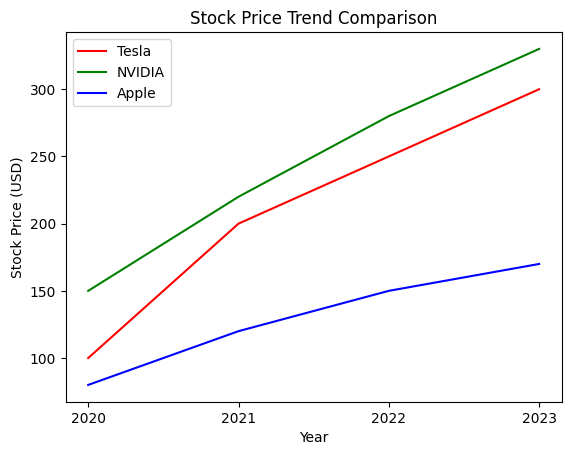

In [ ]:
import matplotlib.pyplot as plt

# Example stock performance data
time = ['2020', '2021', '2022', '2023']
tesla_stock = [100, 200, 250, 300]  # Example stock prices for Tesla
nvidia_stock = [150, 220, 280, 330]  # Example stock prices for NVIDIA
apple_stock = [80, 120, 150, 170]    # Example stock prices for Apple

# Plot the stock price trends
plt.plot(time, tesla_stock, label='Tesla', color='r')
plt.plot(time, nvidia_stock, label='NVIDIA', color='g')
plt.plot(time, apple_stock, label='Apple', color='b')

# Add title and labels
plt.title('Stock Price Trend Comparison')
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')

# Show legend
plt.legend()

# Show the plot
plt.show()
